In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [7]:
from sklearn.model_selection import train_test_split

In [2]:
import keras

2023-05-22 13:50:30.375414: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [99]:
from keras.callbacks import EarlyStopping

In [108]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [3]:
color_data = pd.read_csv('rgb_color_labels.csv')
color_data.head()

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green


In [4]:
color_data.shape

(5052, 4)

In [12]:
color_data.isna().sum()

red      0
green    0
blue     0
label    0
dtype: int64

In [6]:
ohe_data = pd.get_dummies(color_data, columns=['label'])
ohe_data.head()

,red,green,blue,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
0,20,139,240,0,1,0,0,0,0,0,0,0,0,0
1,174,83,72,0,0,1,0,0,0,0,0,0,0,0
2,144,249,131,0,0,0,1,0,0,0,0,0,0,0
3,168,25,156,0,0,0,0,0,0,1,0,0,0,0
4,30,182,136,0,0,0,1,0,0,0,0,0,0,0


In [8]:
seed = 349893

X_train, X_test, y_train, y_test = train_test_split(ohe_data.loc[:, ['red', 'green', 'blue']].copy(),
                                                    ohe_data.drop(['red', 'green', 'blue'], axis=1),
                                                    test_size=0.2,
                                                    random_state=seed)

In [9]:
print(X_train.shape)
print(y_train.shape)

print(X_test.shape)
print(y_test.shape)

(4041, 3)
(4041, 11)
(1011, 3)
(1011, 11)


In [10]:
X_train.head()

,red,green,blue
2860,66,184,240
4491,227,111,214
3778,43,1,66
527,61,127,159
2395,77,252,50


In [11]:
y_train.head()

,label_Black,label_Blue,label_Brown,label_Green,label_Grey,label_Orange,label_Pink,label_Purple,label_Red,label_White,label_Yellow
2860,0,1,0,0,0,0,0,0,0,0,0
4491,0,0,0,0,0,0,1,0,0,0,0
3778,1,0,0,0,0,0,0,0,0,0,0
527,0,1,0,0,0,0,0,0,0,0,0
2395,0,0,0,1,0,0,0,0,0,0,0


In [14]:
from keras.layers import Input, Dense, Dropout
from keras.models import Sequential

In [45]:
baseline_model = Sequential()

baseline_model.add(Input(shape=(3,)))
baseline_model.add(Dense(11, activation='softmax'))

In [46]:
baseline_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 11)                44        
                                                                 
Total params: 44
Trainable params: 44
Non-trainable params: 0
_________________________________________________________________


In [47]:
baseline_model.compile(loss='categorical_crossentropy',
                       metrics='accuracy')

In [48]:
summary = baseline_model.fit(X_train, y_train, batch_size=50, epochs=100, verbose=0, validation_split=0.2)

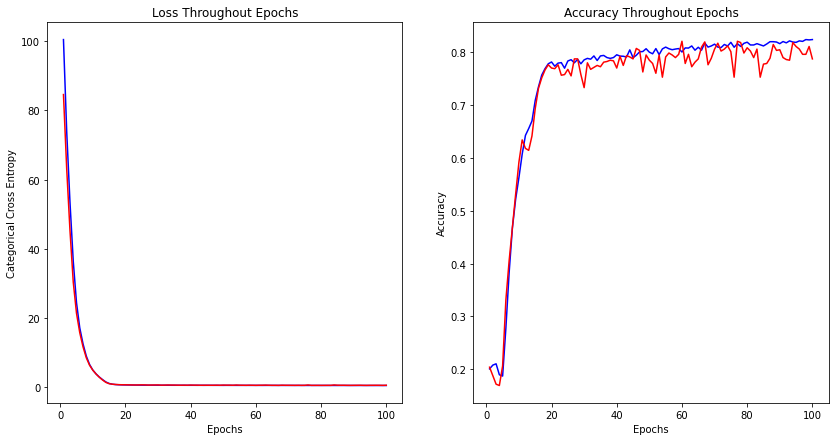

In [49]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 101), history['loss'], label='training', c='b')
plt.plot(range(1, 101), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 101), history['accuracy'], label='training', c='b')
plt.plot(range(1, 101), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

Our baseline model is essentially an instance of logistic regression - a neural network with no hidden layers, and a softmax output layer.

We see both training and validation loss decreasing smoothly, and training and validation accuracy increasing, up to about 20 epochs, then oscillating.

In [52]:
model2 = Sequential()

model2.add(Input(shape=(3,)))
model2.add(Dense(7, activation='relu'))
model2.add(Dense(11, activation='softmax'))

In [53]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 7)                 28        
                                                                 
 dense_3 (Dense)             (None, 11)                88        
                                                                 
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________


In [54]:
model2.compile(loss='categorical_crossentropy', metrics='accuracy')

In [55]:
summary = model2.fit(X_train, y_train, batch_size=50, epochs=100, verbose=0, validation_split=0.2)

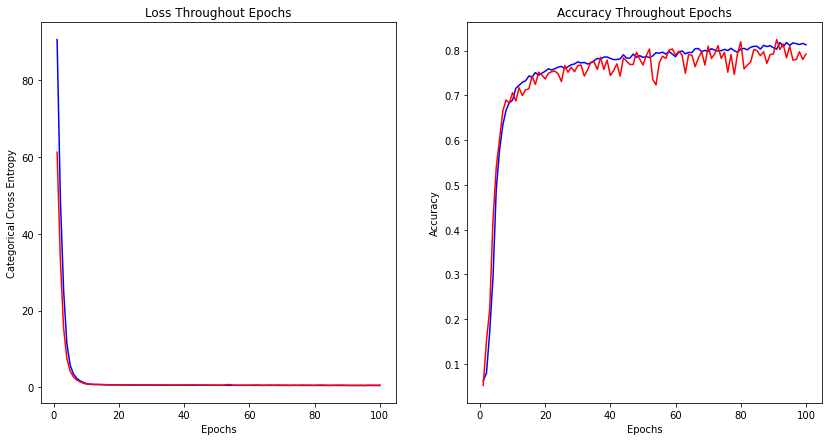

In [56]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 101), history['loss'], label='training', c='b')
plt.plot(range(1, 101), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 101), history['accuracy'], label='training', c='b')
plt.plot(range(1, 101), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

In [57]:
summary = model2.fit(X_train, y_train, batch_size=50, epochs=500, verbose=0, validation_split=0.2)

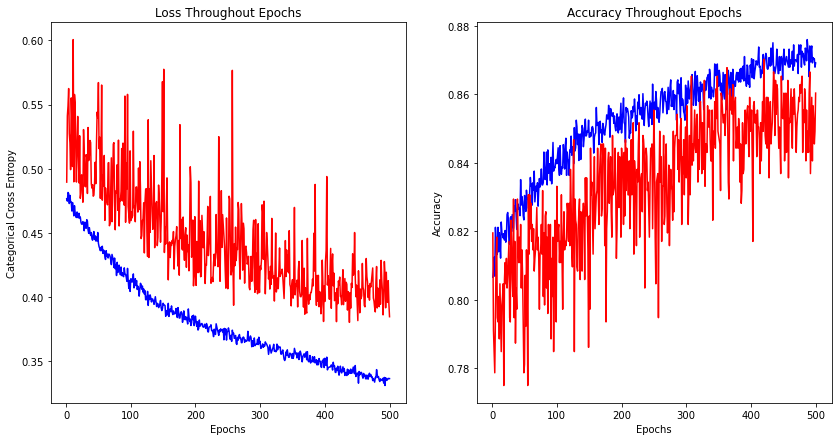

In [59]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 501), history['loss'], label='training', c='b')
plt.plot(range(1, 501), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 501), history['accuracy'], label='training', c='b')
plt.plot(range(1, 501), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

We see some overfitting happening with the addition of many more epochs of training, and a large amount of oscillation. Let's add regularization to our model.

In [60]:
model3 = Sequential()

model3.add(Input(shape=(3,)))
model3.add(Dense(7, activation='relu'))
model3.add(Dropout(0.2))
model3.add(Dense(11, activation='softmax'))

In [61]:
model3.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 28        
                                                                 
 dropout (Dropout)           (None, 7)                 0         
                                                                 
 dense_5 (Dense)             (None, 11)                88        
                                                                 
Total params: 116
Trainable params: 116
Non-trainable params: 0
_________________________________________________________________


In [62]:
model3.compile(loss='categorical_crossentropy', metrics='accuracy')

In [63]:
summary = model3.fit(X_train, y_train, batch_size=50, epochs=100, verbose=0, validation_split=0.2)

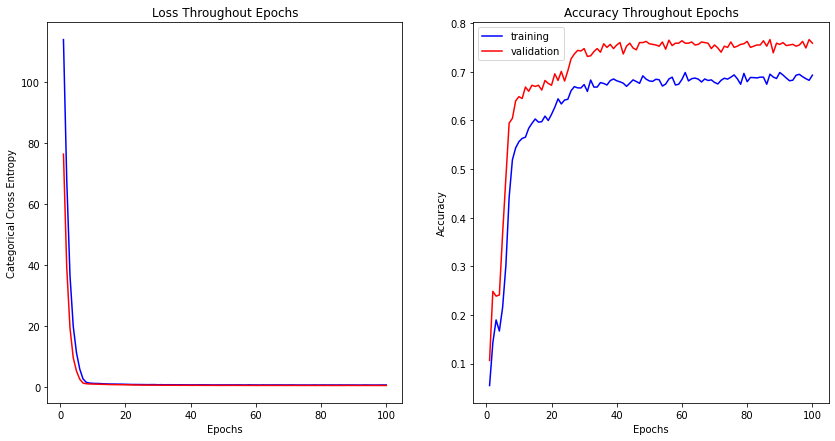

In [65]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 101), history['loss'], label='training', c='b')
plt.plot(range(1, 101), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 101), history['accuracy'], label='training', c='b')
plt.plot(range(1, 101), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy')
ax[1].legend();

Very strangely, validation accuracy has beaten training accuracy.

In [66]:
summary = model3.fit(X_train, y_train, batch_size=50, epochs=500, verbose=0, validation_split=0.2)

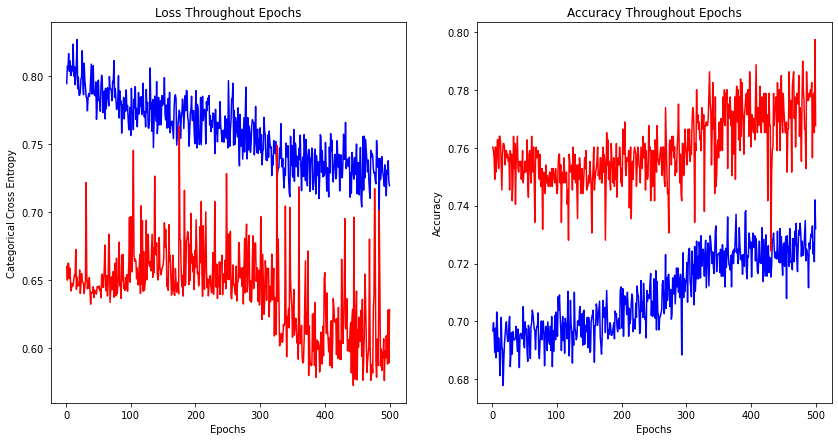

In [67]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 501), history['loss'], label='training', c='b')
plt.plot(range(1, 501), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 501), history['accuracy'], label='training', c='b')
plt.plot(range(1, 501), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

In [68]:
model4 = Sequential()

model4.add(Input(shape=(3,)))
model4.add(Dense(6, activation='relu'))
model4.add(Dense(9, activation='relu'))
model4.add(Dense(11, activation='softmax'))

In [69]:
model4.compile(loss='categorical_crossentropy', metrics='accuracy')

In [70]:
summary = model4.fit(X_train, y_train, batch_size=50, epochs=500, verbose=0, validation_split=0.2)

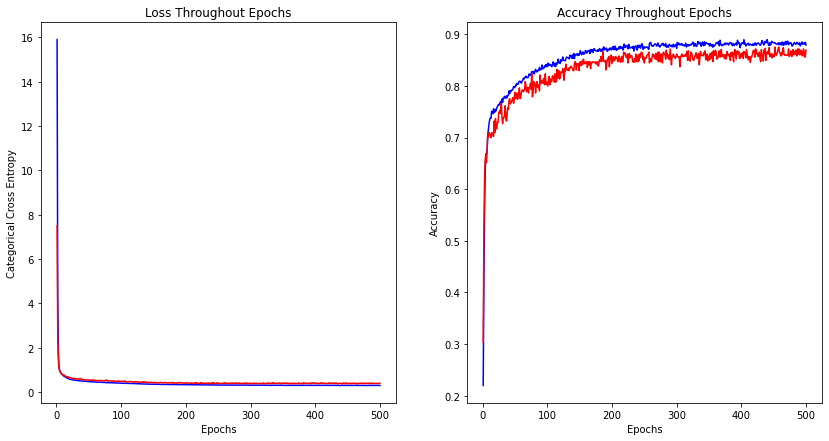

In [71]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 501), history['loss'], label='training', c='b')
plt.plot(range(1, 501), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 501), history['accuracy'], label='training', c='b')
plt.plot(range(1, 501), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

In [72]:
model5 = Sequential()

model5.add(Input(shape=(3,)))
model5.add(Dense(6, activation='relu'))
model5.add(Dense(9, activation='relu'))
model5.add(Dense(9, activation='relu'))
model5.add(Dense(11, activation='softmax'))

In [73]:
model5.compile(loss='categorical_crossentropy', metrics='accuracy')

In [74]:
summary = model5.fit(X_train, y_train, batch_size=50, epochs=500, verbose=0, validation_split=0.2)

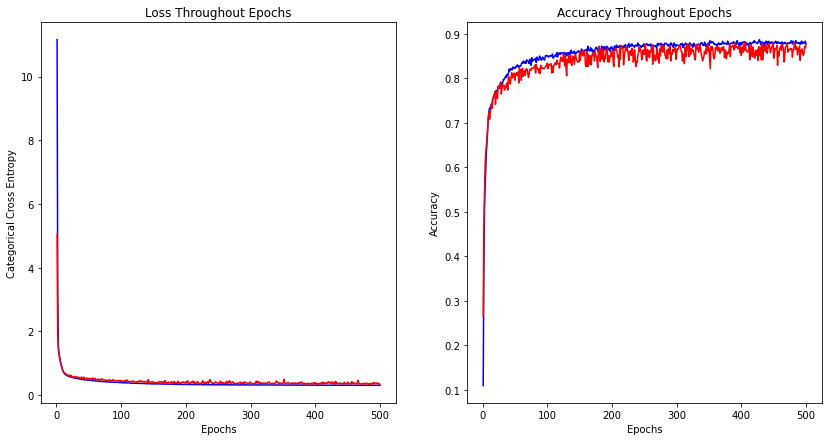

In [75]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 501), history['loss'], label='training', c='b')
plt.plot(range(1, 501), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 501), history['accuracy'], label='training', c='b')
plt.plot(range(1, 501), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

In [76]:
summary = model4.fit(X_train, y_train, batch_size=50, epochs=500, verbose=0, validation_split=0.2)

In [79]:
print(f"Best validation accuracy score: {np.max(summary.history['val_accuracy'])}")
print(f"Occurred after: {np.argmax(summary.history['val_accuracy']) + 1} epochs")

Best validation accuracy score: 0.8800988793373108
Occurred after: 485 epochs


In [85]:
model6 = Sequential()

model6.add(Input(shape=(3,)))
model6.add(Dense(18, activation='relu'))
model6.add(Dense(33, activation='relu'))
model6.add(Dense(22, activation='relu'))
model6.add(Dense(11, activation='softmax'))

In [86]:
model6.compile(loss='categorical_crossentropy', metrics='accuracy')

In [82]:
summary = model6.fit(X_train, y_train, batch_size=50, epochs=500, verbose=0, validation_split=0.2)

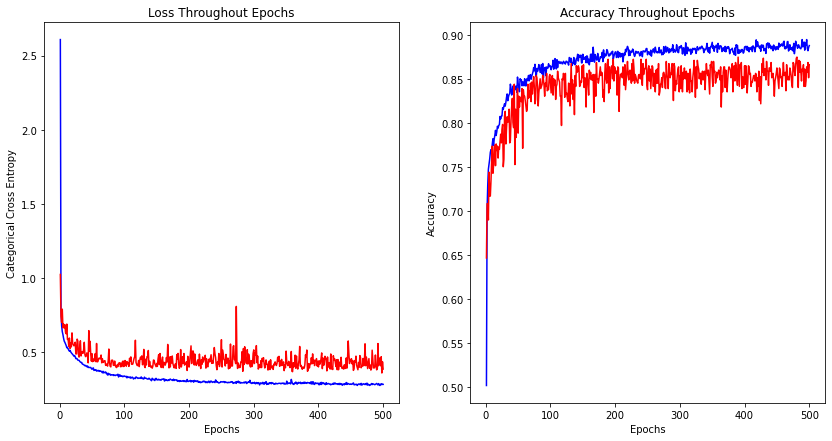

In [83]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 501), history['loss'], label='training', c='b')
plt.plot(range(1, 501), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 501), history['accuracy'], label='training', c='b')
plt.plot(range(1, 501), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

In [87]:
model7 = Sequential()

model7.add(Input(shape=(3,)))
model7.add(Dense(18, activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(33, activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(22, activation='relu'))
model7.add(Dropout(0.2))
model7.add(Dense(11, activation='softmax'))

In [88]:
model7.compile(loss='categorical_crossentropy', metrics='accuracy')

In [89]:
summary = model7.fit(X_train, y_train, batch_size=50, epochs=500, verbose=0, validation_split=0.2)

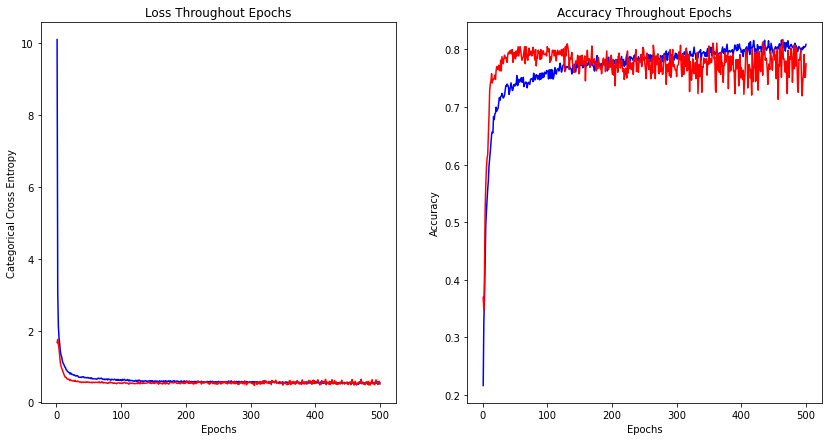

In [90]:
history = summary.history

fig, ax = plt.subplots(ncols=2, figsize=(14, 7))

plt.sca(ax[0])
plt.plot(range(1, 501), history['loss'], label='training', c='b')
plt.plot(range(1, 501), history['val_loss'], label='validation', c='r')
ax[0].set_title('Loss Throughout Epochs')
ax[0].set(xlabel='Epochs', ylabel='Categorical Cross Entropy')

plt.sca(ax[1])
plt.plot(range(1, 501), history['accuracy'], label='training', c='b')
plt.plot(range(1, 501), history['val_accuracy'], label='validation', c='r')
ax[1].set_title('Accuracy Throughout Epochs')
ax[1].set(xlabel='Epochs', ylabel='Accuracy');

Model 4 has had the best performance so far. Let's test the model's performance on the holdout test set.

In [102]:
early_stop = EarlyStopping(monitor="accuracy", patience=5, verbose=0)

In [104]:
summary = model4.fit(X_train, y_train, batch_size=50, epochs=500, callbacks=[early_stop], verbose=0)

In [105]:
summary.history

{'loss': [0.3160165548324585,
  0.30997350811958313,
  0.3101648986339569,
  0.3106464743614197,
  0.31043878197669983,
  0.3132217824459076,
  0.31031978130340576,
  0.3129309415817261,
  0.3084429204463959,
  0.31161996722221375,
  0.30750927329063416],
 'accuracy': [0.8780004978179932,
  0.8787428736686707,
  0.8789903521537781,
  0.8807225823402405,
  0.879980206489563,
  0.8827022910118103,
  0.8775055408477783,
  0.8775055408477783,
  0.8802276849746704,
  0.8789903521537781,
  0.8802276849746704]}

In [115]:
y_test_probs = model4.predict(X_test)

32/32 [==============================] - 0s 552us/step


In [117]:
y_test_preds = [np.argmax(example) for example in y_test_probs]

In [134]:
mapping = dict(zip(y_test.columns, range(11)))

In [137]:
y_test_true = y_test.idxmax(axis=1).replace(mapping)

In [139]:
print(classification_report(y_test_true, y_test_preds))

              precision    recall  f1-score   support

           0       0.89      0.80      0.84        10
           1       0.94      0.91      0.92       223
           2       0.75      0.83      0.79        83
           3       0.92      0.94      0.93       295
           4       0.62      0.83      0.71        24
           5       0.77      0.54      0.63        37
           6       0.81      0.91      0.86       127
           7       0.77      0.75      0.76       104
           8       0.92      0.75      0.83        44
           9       1.00      1.00      1.00         4
          10       0.83      0.75      0.79        60

    accuracy                           0.86      1011
   macro avg       0.84      0.82      0.82      1011
weighted avg       0.86      0.86      0.86      1011



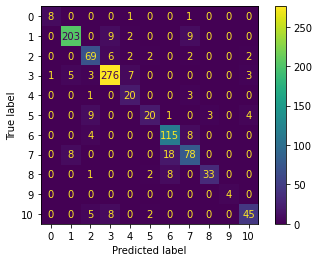

In [140]:
ConfusionMatrixDisplay(
confusion_matrix(y_test_true, y_test_preds)
).plot();

The model does pretty well on classes for which there is adequate support. Perhaps we can augment the data used to train the model?

In [92]:
color_data.label.value_counts()

Green     1457
Blue      1107
Pink       579
Purple     553
Brown      376
Yellow     285
Red        236
Orange     205
Grey       174
Black       51
White       29
Name: label, dtype: int64

Green and blue dominate our dataset. Are they the most frequently occurring colors, or is this an example of problematic class imbalance?

<Axes: ylabel='Frequency'>

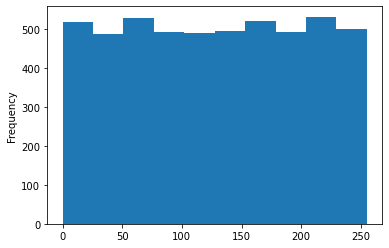

In [94]:
color_data.red.plot(kind='hist')

<Axes: ylabel='Frequency'>

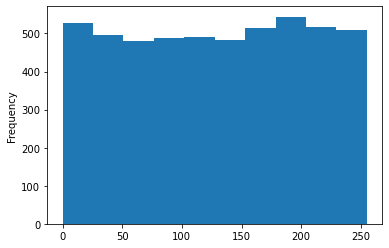

In [95]:
color_data.blue.plot(kind='hist')

<Axes: ylabel='Frequency'>

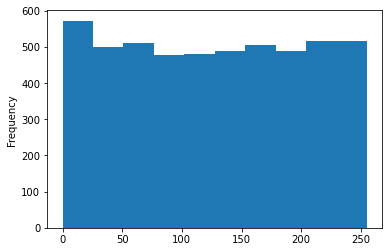

In [96]:
color_data.green.plot(kind='hist')

In [97]:
color_data

,red,green,blue,label
0,20,139,240,Blue
1,174,83,72,Brown
2,144,249,131,Green
3,168,25,156,Pink
4,30,182,136,Green
...,...,...,...,...
5047,26,26,26,Black
5048,27,27,27,Black
5049,28,28,28,Black
5050,29,29,29,Black
